# 2022-1 빅데이터와 인공지능 14주차 Reports

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, silhouette_samples, silhouette_score
from sklearn.cluster import KMeans

from scipy.cluster.hierarchy import linkage, fcluster

from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load datasets
from sklearn.datasets import load_iris
iris_data = load_iris()

## 14주차 1차시
### Question 1
* IRIS(붓꽃) 데이터에 대해 하이퍼파라미터(거리 개념)를 변경하면서 계층적군집화의 분류(군집화) 성능을 점검하시오.

In [3]:
# Create dataframes
df_X = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)
df_y = pd.DataFrame(data=iris_data.target, columns=['Species'])
df_iris = pd.concat([df_X, df_y], axis=1)
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
# Feature Scaling - Normalization
iris_scaler = MinMaxScaler().fit(df_X)
iris_new = pd.DataFrame(iris_scaler.transform(df_X), columns=iris_data.feature_names)
iris_new = pd.concat([iris_new, df_y], axis=1)
iris_new.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,0.222222,0.625000,0.067797,0.041667,0
1,0.166667,0.416667,0.067797,0.041667,0
2,0.111111,0.500000,0.050847,0.041667,0
3,0.083333,0.458333,0.084746,0.041667,0
4,0.194444,0.666667,0.067797,0.041667,0


In [5]:
# Split train and test datasets
iris_X = iris_new.drop('Species', axis=1)
iris_y = iris_new['Species']
iris_X_train, iris_X_test, iris_y_train, iris_y_test = train_test_split(iris_X, iris_y, test_size=0.2, random_state=0, stratify=df_y)
print(">>> X_train shape:", iris_X_train.shape)
print(">>> X_test shape:", iris_X_test.shape)
print(">>> y_train shape:", iris_y_train.shape)
print(">>> y_test shape:", iris_y_test.shape)

>>> X_train shape: (120, 4)
>>> X_test shape: (30, 4)
>>> y_train shape: (120,)
>>> y_test shape: (30,)


In [6]:
# Clustering
Cluster = linkage(y=iris_new.iloc[:, :4], method='single', metric='euclidean')
Cut_tree = fcluster(Cluster, t=0.3, criterion='distance')
iris_new['cluster'] = Cut_tree

avererage_score = silhouette_score(iris_new.iloc[:, :4], iris_new['cluster'])
print(">>> Average score:", avererage_score)

>>> Average score: 0.6300471284354711


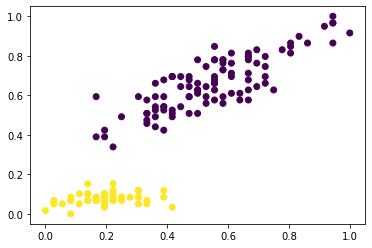

In [7]:
# Visualization
plt.scatter(x=iris_new['sepal length (cm)'], y=iris_new['petal length (cm)'], c=iris_new['cluster'], cmap='viridis')

### Answer 1

In [8]:
# Comparison of different clustering algorithms
list_methods = ['ward', 'complete', 'average', 'single']

for i in list_methods:
    Cluster = linkage(y=iris_new.iloc[:, :4], method=i, metric='euclidean')
    Cut_tree = fcluster(Cluster, t=0.3, criterion='distance')
    avererage_score = silhouette_score(iris_new.iloc[:, :4], Cut_tree)
    print(f">>> Average silhouette score for {i}: {avererage_score}")

>>> Average silhouette score for ward: 0.29820062091427746
>>> Average silhouette score for complete: 0.2877624689243592
>>> Average silhouette score for average: 0.3131109193882723
>>> Average silhouette score for single: 0.6300471284354711


## 14주차 2차시
### Question 2
* IRIS(붓꽃) 데이터의 설명변수 4종 중 군집분석의 효율성과 성능을 고려할 때, 선택할 수 있는 최소의 변수를 탐색하시오.

In [9]:
# Indexing two columns from whole feautres
Feature_full = iris_new.iloc[:, :4]
Feature_part = iris_new[['sepal length (cm)', 'sepal width (cm)']]
Feature_part.head()

,sepal length (cm),sepal width (cm)
0,0.222222,0.625000
1,0.166667,0.416667
2,0.111111,0.500000
3,0.083333,0.458333
4,0.194444,0.666667


In [10]:
# Clustering - whole features
Model_full = KMeans(n_clusters=3, algorithm='auto')
Model_full.fit(Feature_full)
Predict_full = pd.DataFrame(Model_full.predict(Feature_full))
Predict_full.columns = ['predict_full']
R_full = pd.concat([Feature_full, Predict_full], axis=1)
R_full

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),predict_full
0,0.222222,0.625000,0.067797,0.041667,0
1,0.166667,0.416667,0.067797,0.041667,0
2,0.111111,0.500000,0.050847,0.041667,0
3,0.083333,0.458333,0.084746,0.041667,0
4,0.194444,0.666667,0.067797,0.041667,0
...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,2
146,0.555556,0.208333,0.677966,0.750000,1
147,0.611111,0.416667,0.711864,0.791667,2
148,0.527778,0.583333,0.745763,0.916667,2


In [11]:
# Cluistering - part of features
Model_part = KMeans(n_clusters=3, algorithm='auto')
Model_part.fit(Feature_part)
Predict_part = pd.DataFrame(Model_part.predict(Feature_part))
Predict_part.columns = ['predict_part']
R_part = pd.concat([Feature_part, Predict_part], axis=1)
R_part

,sepal length (cm),sepal width (cm),predict_part
0,0.222222,0.625000,1
1,0.166667,0.416667,1
2,0.111111,0.500000,1
3,0.083333,0.458333,1
4,0.194444,0.666667,1
...,...,...,...
145,0.666667,0.416667,2
146,0.555556,0.208333,0
147,0.611111,0.416667,2
148,0.527778,0.583333,2


In [12]:
# Confusion matrix
Con_Mat_Full = pd.crosstab(iris_new['Species'], R_full['predict_full'])
Con_Mat_Part = pd.crosstab(iris_new['Species'], R_part['predict_part'])

In [13]:
# Silhouette score for full or part of features
silhouette_score_full = silhouette_score(Feature_full, Predict_full)
print(">>> Silhouette score for whole features: ", silhouette_score_full)
silhouette_score_part = silhouette_score(Feature_part, Predict_part)
print(">>> Silhouette score for part of features: ", silhouette_score_part)

>>> Silhouette score for whole features:  0.5047687565398589
>>> Silhouette score for part of features:  0.44419861784050124


In [14]:
# Create empty DataFrame for saving results
df_cluster_results = pd.DataFrame(columns=['Feature 1', 'Feature 2', 'silhouette_score'])
df_cluster_results

,Feature 1,Feature 2,silhouette_score


In [15]:
# Comparison between feautres
list_R_test = []
n = 0

for i in iris_data.feature_names:
    for j in iris_data.feature_names:
        if i != j:
            df_cluster_results.loc[n, 'Feature 1'] = i
            df_cluster_results.loc[n, 'Feature 2'] = j

            Feature_test = iris_new[[i, j]]
            Model_test = KMeans(n_clusters=3, algorithm='auto')
            Model_test.fit(Feature_test)
            Predict_test = pd.DataFrame(Model_test.predict(Feature_test))
            Predict_test.columns = ['predict_test']
            R_test = pd.concat([Feature_test, Predict_test], axis=1)

            silhouette_score_test = silhouette_score(R_test, Predict_test)
            df_cluster_results.iloc[n, 2] = silhouette_score_test
            
            print(f">>> Silhouette score for {i} and {j}: {silhouette_score_test}")
            list_R_test.append(silhouette_score_test)
            n += 1

>>> Silhouette score for sepal length (cm) and sepal width (cm): 0.8181070704809313
>>> Silhouette score for sepal length (cm) and petal length (cm): 0.8568069068499352
>>> Silhouette score for sepal length (cm) and petal width (cm): 0.8432109418094808
>>> Silhouette score for sepal width (cm) and sepal length (cm): 0.8181070704809313
>>> Silhouette score for sepal width (cm) and petal length (cm): 0.8357677601772232
>>> Silhouette score for sepal width (cm) and petal width (cm): 0.8287151117457234
>>> Silhouette score for petal length (cm) and sepal length (cm): 0.8642135751784978
>>> Silhouette score for petal length (cm) and sepal width (cm): 0.8495612395806148
>>> Silhouette score for petal length (cm) and petal width (cm): 0.9035061673457414
>>> Silhouette score for petal width (cm) and sepal length (cm): 0.827436864627598
>>> Silhouette score for petal width (cm) and sepal width (cm): 0.8421925316128377
>>> Silhouette score for petal width (cm) and petal length (cm): 0.9035061673

In [16]:
# Sort values - Descending
df_cluster_results.sort_values(by='silhouette_score', ascending=False, inplace=True)
df_cluster_results

,Feature 1,Feature 2,silhouette_score
11,petal width (cm),petal length (cm),0.903506
8,petal length (cm),petal width (cm),0.903506
6,petal length (cm),sepal length (cm),0.864214
1,sepal length (cm),petal length (cm),0.856807
7,petal length (cm),sepal width (cm),0.849561
2,sepal length (cm),petal width (cm),0.843211
10,petal width (cm),sepal width (cm),0.842193
4,sepal width (cm),petal length (cm),0.835768
5,sepal width (cm),petal width (cm),0.828715
9,petal width (cm),sepal length (cm),0.827437


### Answer 2
1.  silhoutette score를 검토한 결과, Feature로 'petal length (cm)', 'petal width (cm)'를 선택했을 때, 0.903506로 가장 높은 성능을 확인할 수 있었다.
2. 따라서, 최소의 변수로 'petal length (cm)', 'petal width (cm)'를 선택하였다.

## 12주차 3차시
### Question 3
* 추천 시스템에서 사용되고 있는 군집 분석 알고리즘과 하이퍼 파라미터(거리 개념) 등에 대해 조사 하시오.

### Answer 3
1. OTT 서비스 중 대표적으로 '넷플릭스(Netflix)'의 추천시스템에서 사용된는 **군집 분석 알고리즘은 협업 필터링**이다.
2. 협업 필터링은 사용자의 선호도를 기반으로 군집을 분류하는 방법이다. 따라서 **개개인의 취향을 기반으로 군집을 분류**하는 것이다.
3. 특히 여기서, 협업 필터링의 핵심은 '가까운 거리'이다.
4. 구체적으로, 서로 다른 두 영화에 각각 평가를 매기고, 그 평가를 기반으로 **가장 가까운 거리에 위치한 또 다른 영화**를 추천하는 것이다.  
[참고 링크](http://www.astronomer.rocks/news/articleView.html?idxno=86454)
> 추천시스템에 사용된 군집 분석 알고리즘: 협업필터링  
> 하이퍼파라미터(거리 개념): 가장 가까운 거리  
